# Plot  Simulated $Z+$jets Events

These are ROOT files containing a TTree made from PYTHIA8 with Z+jets with [these instructions](https://github.com/rappoccio/PythiaGenJets) and with [this configuration](https://github.com/rappoccio/PythiaGenJets/blob/master/test_run_all.cfg). The interaction energy is required to be larger than 150 GeV at the generator level. 

#### Uncomment these if you need to make / run pythia2root

In [1]:
! make pythia2root

make: 'pythia2root' is up to date.


In [2]:
! ./pythia2root zjets.cfg zjets.root 10000


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.306      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 28 Jun 2021  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 22 Feb 2022 at 15:24:13    |  | 
 |  |                                                                              |  | 
 |  |   Program docu


 --------  PYTHIA Info Listing  ---------------------------------------- 
 
 Beam A: id =   2212, pz =  6.500e+03, e =  6.500e+03, m =  9.383e-01.
 Beam B: id =   2212, pz = -6.500e+03, e =  6.500e+03, m =  9.383e-01.

 In 1: id =    1, x =  2.494e-01, pdf =  1.811e-01 at Q2 =  9.099e+03.
 In 2: id =   -1, x =  2.158e-04, pdf =  2.718e+00 at same Q2.

 Subprocess f fbar -> f' fbar' (s-channel gamma*/Z0) with code 224 is 2 -> 2.
 It has sHat =  9.099e+03,    tHat = -1.520e+03,    uHat = -7.579e+03,
       pTHat =  3.558e+01,   m3Hat =  5.110e-04,   m4Hat =  5.110e-04,
    thetaHat =  8.421e-01,  phiHat =  5.423e+00.
     alphaEM =  7.822e-03,  alphaS =  1.291e-01    at Q2 =  9.099e+03.

 Impact parameter b =  6.001e-01 gives enhancement factor =  1.986e+00.
 Max pT scale for MPI =  1.300e+04, ISR =  1.300e+04, FSR =  1.300e+04.
 Number of MPI =    13, ISR =    31, FSRproc =   112, FSRreson =     2.

 --------  End PYTHIA Info Listing  ------------------------------------

 --------  PY

   910        111  (pi0)              -83   901   909  1418  1419     0     0     -0.079     -0.552     -6.069      6.096      0.135
   911       -211  pi-                 83   901   909     0     0     0     0     -0.039      0.072     -0.863      0.878      0.140
   912        113  (rho0)             -83   901   909  1255  1256     0     0      0.228      0.556     -3.193      3.379      0.929
   913        211  pi+                 83   901   909     0     0     0     0     -0.203     -0.621     -0.357      0.758      0.140
   914       -213  (rho-)             -83   901   909  1257  1258     0     0     -0.867     -0.943     -1.095      1.898      0.874
   915        213  (rho+)             -83   901   909  1259  1260     0     0     -0.681     -0.379      0.550      1.292      0.872
   916       -211  pi-                 83   901   909     0     0     0     0     -0.081     -0.861     -0.490      1.004      0.140
   917        211  pi+                 83   901   909     0     0    

 PYTHIA Error in StringFragmentation::fragment: stuck in joining  
 PYTHIA Error in Pythia::next: hadronLevel failed; try again  
 PYTHIA Warning in StringFragmentation::fragmentToJunction: bad convergence junction rest frame  
 PYTHIA Warning in Pythia::check: not quite matched particle energy/momentum/mass  
 PYTHIA Error in SimpleSpaceShower::pT2nearThreshold: stuck in loop  

 Pythia::next(): 1000 events have been generated 

 Pythia::next(): 2000 events have been generated 

 Pythia::next(): 3000 events have been generated 

 Pythia::next(): 4000 events have been generated 
 PYTHIA Warning in SimpleSpaceShower::pT2nextQCD: small daughter PDF  
 PYTHIA Warning in MultipartonInteractions::pTnext: weight above unity  

 Pythia::next(): 5000 events have been generated 

 Pythia::next(): 6000 events have been generated 

 Pythia::next(): 7000 events have been generated 
 PYTHIA Warning in Pythia::check: energy-momentum not quite conserved  

 Pythia::next(): 8000 events have been gener

### Import python libraries for ROOT, fastjet, pythia8

In [3]:
import ROOT

Welcome to JupyROOT 6.22/02


### Get the TTree

In [4]:

f = ROOT.TFile("zjets.root")
t = f.Get("T")

ROOT.gStyle.SetPadLeftMargin(0.2)
ROOT.gStyle.SetOptStat(000000)
ROOT.gStyle.SetTitleOffset(1.5, "X")

### Make a canvas, draw a variable 

We will draw the logarithm of the ratio of the jet mass to the jet transverse momentum, $\rho = m/p_{T}$. 

The distribution here will be:

\begin{equation}
\frac{\rho}{N}\frac{dN}{d\rho}
\end{equation}

We plot this quantity because it approximates the differential cross section with respect to $\log{\rho}$. 

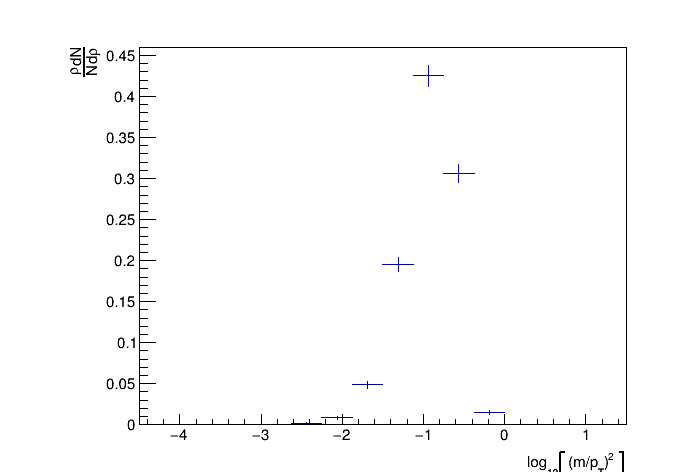

In [5]:
# Make a canvas:
c1 = ROOT.TCanvas("c1", "c1")
# Create a histogram with the bins we like.
# Syntax is "name", "title", Nbins, xmin, xmax
h_rho = ROOT.TH1F("h_rho", ";log_{10}#left[ (m/p_{T})^{2} #right];#frac{#rho}{N}#frac{dN}{d#rho}", 16, -4.5, 1.5)
# Draw the histogram. The cuts are pt > 250 GeV and m > 0.05 GeV. 
# We also apply a weight of m/pt to approximate taking the derivative wrt log(rho)
t.Draw("2*log10(jet_m[0] / jet_pt[0]) >> h_rho", "jet_pt[0] > 250 * jet_m[0] > 0.05 * jet_m[0]/jet_pt[0]")
# Scale the histogram by the number of entries. 
h_rho.Scale(1.0/h_rho.GetEntries())
# Plot the histogram on the canvas
h_rho.Draw()
# Plot the canvas
c1.Draw()